# Programming for Neuroscience

This notebook explores basic concepts related to analyzing audio stimuli and neural responses, relevant to understanding how the brain processes sound.

**Outline:**
- Exploring audio stimuli for four categories **bold text**(cat, dog, cow, and rooster).
- Analyzing neural data and visualizing responses to stimuli.
- Comparing neural responses across different stimulus categories.


## Research question: Which animal does the ferret like the most?
(Or more scientific: which sound drives the strongest response in the ferret auditory cortex?)


Let's start by first downloading the git repo.

In [61]:
import os

# Define the repository URL
repo_url = 'https://github.com/sbp894/NGP_intro_to_programming.git'

# Define the directory to clone into
clone_dir = 'NGP_intro_to_programming'

# Check if the repository is already cloned to avoid re-cloning
if not os.path.exists(clone_dir):
    print(f"Cloning {repo_url}...")
    !git clone {repo_url}
else:
    print(f"Repository already cloned in {clone_dir}.")

# Navigate to the specific data directory within the cloned repo
data_path = os.path.join(clone_dir)
os.chdir(data_path)

print(f"\nChanged directory to: {os.getcwd()}")
print(f"Current directory contains the following files: {os.listdir()}")


Cloning https://github.com/sbp894/NGP_intro_to_programming.git...
Cloning into 'NGP_intro_to_programming'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 178 (delta 2), reused 174 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (178/178), 12.48 MiB | 8.49 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (170/170), done.

Changed directory to: /content/drive/MyDrive/OHSU_files/Teaching/bootcamp_colab/NGP_intro_to_programming/processed_data/NGP_intro_to_programming/NGP_intro_to_programming/NGP_intro_to_programming/NGP_intro_to_programming/NGP_intro_to_programming
Current directory contains the following files: ['.git', 'README.md', 'figures', 'processed_data', 'scripts', 'stimuli']


# Exploring stimuli.


## Read all the stimuli in the stimulus folder.

In [62]:
import scipy.io.wavfile

# Define the directory path using a relative path from the current working directory
# The current working directory is set in the previous cell to clone_dir
stimuli_dir = './stimuli'

# List all files in the directory
all_files = os.listdir(stimuli_dir)

# Filter for .wav files
wav_files = [f for f in all_files if f.endswith('.wav')]

print(f"Found {len(wav_files)} .wav files.")
filenames_to_print = 5
print(f"Printing the names of the first {filenames_to_print} files")
print(wav_files[:filenames_to_print])



Found 160 .wav files.
Printing the names of the first 5 files
['cat_stim_1.wav', 'cat_stim_10.wav', 'cat_stim_11.wav', 'cat_stim_12.wav', 'cat_stim_13.wav']


## Load a file.
Print out its length, sampling frequency, and duration.

In [63]:
# Load one of the wav files (the first one in the list)
if wav_files:
    first_wav_file_path = os.path.join(stimuli_dir, wav_files[0])
    rate, data = scipy.io.wavfile.read(first_wav_file_path)
    print(f"\nLoaded the first file: {wav_files[0]}")
    print(f"Sample rate: {rate}")
    print(f"Data shape: {data.shape}: duration = {len(data)/rate} seconds")
else:
    print("\nNo .wav files found in the directory.")


Loaded the first file: cat_stim_1.wav
Sample rate: 44100
Data shape: (26460,): duration = 0.6 seconds


# Plot the file and play sound.

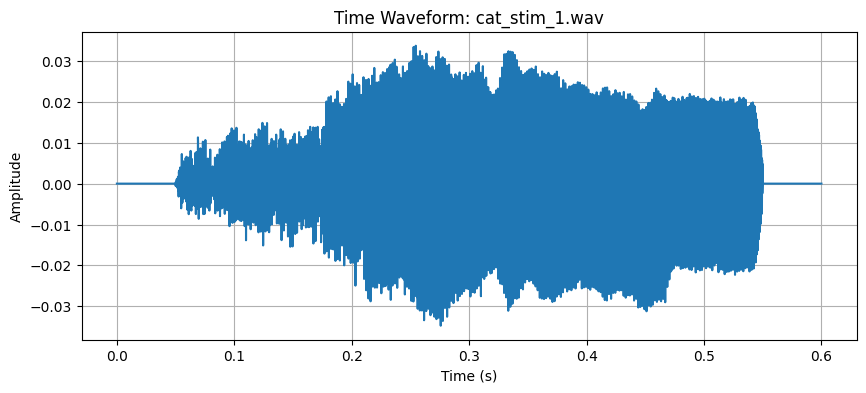

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

# Plot the time waveform
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(data) / rate, len(data)), data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Time Waveform: {wav_files[0]}")
plt.grid(True)
plt.show()

# Play the sound
Audio(data, rate=rate)

# Task
1.   Analyze the `.wav` filenames to determine the number of unique categories based on the filename prefix (e.g., "cat_", "dog_").
2.   For each unique category, load one file and plot its time waveform.

## Identify unique categories

### Subtask:
Extract the category name (e.g., "cat", "dog") from the beginning of each `.wav` filename.

## First: We will use a bad implementation (for loop).

In [65]:
categories_bad_way = []
for filename in wav_files:
    category = filename.split('_')[0]
    categories_bad_way.append(category)

print("Extracted categories (bad way):")
print(categories_bad_way)

Extracted categories (bad way):
['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'roost

## Now, let's use an efficient implementation (using list comprehension).

In [66]:
categories_good_way = [x.split('_')[0] for x in wav_files]
print("Extracted categories (good way):")
print(categories_good_way)

Extracted categories (good way):
['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'rooster', 'roos

## Always test your code (when you try something new)

In [67]:
assert categories_bad_way == categories_good_way, "The two lists are not the same"
# If the two lists are the same, nothing happens and we can move on
print("Nothing happened: So the two lists are the same")


Nothing happened: So the two lists are the same


## Count unique categories

### Subtask:
Determine the number of unique categories found.

In [68]:
unique_categories = set(categories_good_way)
num_unique_categories = len(unique_categories)
print(f"\nNumber of unique categories: {num_unique_categories}")
print(f"Unique categories: {unique_categories}")


Number of unique categories: 4
Unique categories: {'cow', 'rooster', 'cat', 'dog'}


## Select one file per category

### Subtask:
Choose one `.wav` file from each unique category.

In [69]:
selected_files = {}
for filename in wav_files:
    category = filename.split('_')[0]
    if category not in selected_files:
        selected_files[category] = os.path.join(stimuli_dir, filename)

print("Selected files for each category:")
for category, filepath in selected_files.items():
    print(f"{category}: {filepath}")

Selected files for each category:
cat: ./stimuli/cat_stim_1.wav
cow: ./stimuli/cow_stim_1.wav
dog: ./stimuli/dog_stim_1.wav
rooster: ./stimuli/rooster_stim_1.wav


## Load and plot files

### Subtask:
Load the selected files and plot the time waveform for each.

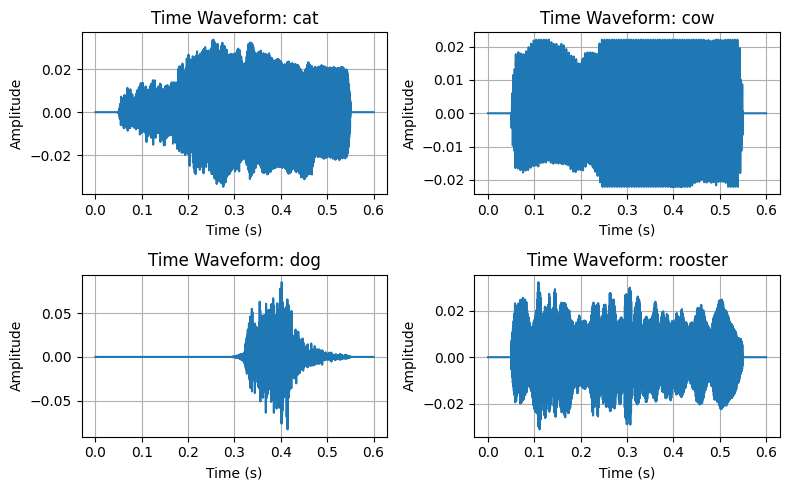

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, (category, filepath) in enumerate(selected_files.items()):
    rate, data = scipy.io.wavfile.read(filepath)

    time_vector = np.linspace(0, len(data) / rate, len(data))
    axes[i].plot(time_vector, data)
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("Amplitude")
    axes[i].set_title(f"Time Waveform: {category}")
    axes[i].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

# Play the sound for each category
for category, filepath in selected_files.items():
    rate, data = scipy.io.wavfile.read(filepath)
    display(Audio(data, rate=rate))

# Neural data

## Load neural data and get a sense of the data by printing its keys.
Note: Pickle files are handy and powerful, but may not be recommended during Development phase (not ideal for sharing).

In [71]:
import pickle
import os

# Define the file path
data_path = './processed_data/recording_rei087.pkl'

# Check if the file exists
if os.path.exists(data_path):
    # Load the data from the pickle file
    with open(data_path, 'rb') as f:
        saved_neural_data = pickle.load(f) # Load into saved_neural_data as in the previous state

    print(f"Successfully loaded data from: {data_path}")

    print("\nKeys in the loaded data:")
    for key in saved_neural_data.keys():
        print(f"- {key}")

else:
    print(f"File not found: {data_path}")

Successfully loaded data from: ./processed_data/recording_rei087.pkl

Keys in the loaded data:
- recording_site_name
- neural_data
- category
- meta_data


## Prior Knowledge about Neural Data

The `neural_data` variable is a **dictionary**.

Each **key** in this dictionary is a **stimulus name**, such as `'cat_stim_6.wav'`.

The **value** associated with each key is a **NumPy array** with the shape `(stimulus_trial, neuron_index, time_index)`.

* **`stimulus_trial`**: This dimension represents the number of times a particular stimulus was presented. (Here 10)
* **`neuron_index`**: This dimension corresponds to the individual neurons being recorded. (Here 38)
* **`time_index`**: This dimension represents the time points or samples recorded for each trial. (Here 60 samples, with 10-ms resolution)

For example, `neural_data['cat_stim_6.wav'] = np.array((stimulus_trial, neuron_index, time_index))` means that the value stored for the key `'cat_stim_6.wav'` is a 3D NumPy array containing the neural responses to that specific stimulus.

## Let us look at the meta data to verify this.


In [72]:
print(f"Meta data keys: {saved_neural_data['meta_data'].keys()}")
print(saved_neural_data['meta_data']['data_dims'])

Meta data keys: dict_keys(['data_dims', 'fs_Hz', 'neuron_names'])
('stimulus_trial', 'neuron_index', 'time_index')


## Let us load some data to verify this.

In [73]:
# because data format = ('stimulus_trial', 'neuron_index', 'time_index')
trial_ind_in_data = 0
neuron_ind_in_data = 1
time_ind_in_data = 2

# Use 'cat_stim_6.wav' as the demo stimulus
demo_stimulus_key = 'cat_stim_6.wav'

neural_data = saved_neural_data['neural_data'] # has neural data for all stimuli, each stimulus is a key
demo_stim_response = neural_data[demo_stimulus_key]

print(f"Number of stimuli in the dataset: {len(neural_data)}")
print(f"Shape of the response for the demo stimulus, '{demo_stimulus_key}': {demo_stim_response.shape}")
print(f"Number of trials: {demo_stim_response.shape[trial_ind_in_data]}")
print(f"Number of neurons: {demo_stim_response.shape[neuron_ind_in_data]}")
print(f"Number of time samples: {demo_stim_response.shape[time_ind_in_data]}")


Number of stimuli in the dataset: 160
Shape of the response for the demo stimulus, 'cat_stim_6.wav': (10, 38, 60)
Number of trials: 10
Number of neurons: 38
Number of time samples: 60


## Let's plot for a single demo neuron.

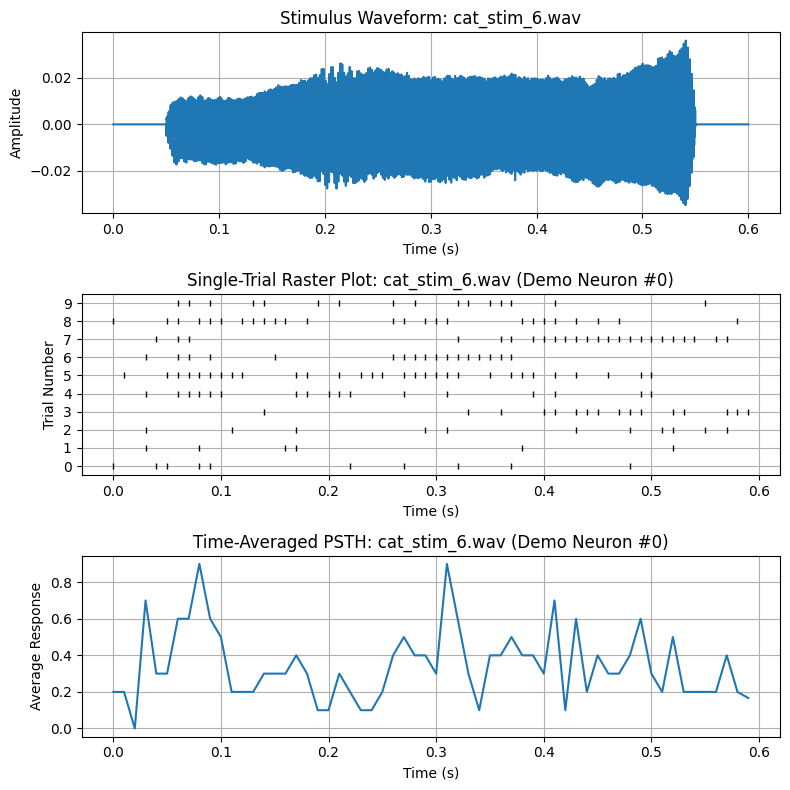

In [74]:
demo_neuron_index = 0

# --- Plotting ---
fig, axes = plt.subplots(3, 1, figsize=(8, 8)) # Reduced figure size
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot Stimulus Time Waveform
stimulus_filepath = os.path.join(stimuli_dir, demo_stimulus_key)
if os.path.exists(stimulus_filepath):
    rate, data = scipy.io.wavfile.read(stimulus_filepath)
    time_vector_stim = np.linspace(0, len(data) / rate, len(data))
    axes[0].plot(time_vector_stim, data)
    axes[0].set_xlabel("Time (s)")
    axes[0].set_ylabel("Amplitude")
    axes[0].set_title(f"Stimulus Waveform: {demo_stimulus_key}")
    axes[0].grid(True)
else:
    axes[0].set_title(f"Stimulus file not found: {demo_stimulus_key}")


# Plot Single-Trial Dot Raster (Demo Neuron: demo_neuron_index)
for trial in range(demo_stim_response.shape[0]):
  spike_indices = np.where(demo_stim_response[trial, demo_neuron_index, :] > 0)[0]
  spike_times = spike_indices / saved_neural_data['meta_data']['fs_Hz']
  axes[1].plot(spike_times, np.ones_like(spike_times) * trial, '|', markersize=5, color='k')

axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Trial Number")
axes[1].set_title(f"Single-Trial Raster Plot: {demo_stimulus_key} (Demo Neuron #{demo_neuron_index})")
axes[1].set_yticks(np.arange(demo_stim_response.shape[0]))
axes[1].set_ylim(-0.5, demo_stim_response.shape[0] - 0.5)
axes[1].grid(True)


# Plot Time-Averaged PSTH (Demo Neuron)
# Calculate average response across trials
avg_response = np.nanmean(demo_stim_response[:, 0, :], axis=0)
time_points_psth = np.arange(len(avg_response)) / saved_neural_data['meta_data']['fs_Hz']

axes[2].plot(time_points_psth, avg_response)
axes[2].set_xlabel("Time (s)")
axes[2].set_ylabel("Average Response")
axes[2].set_title(f"Time-Averaged PSTH: {demo_stimulus_key} (Demo Neuron #{demo_neuron_index})")
axes[2].grid(True)


plt.tight_layout()
plt.show()

## What about all the neurons (for this stimulus)?

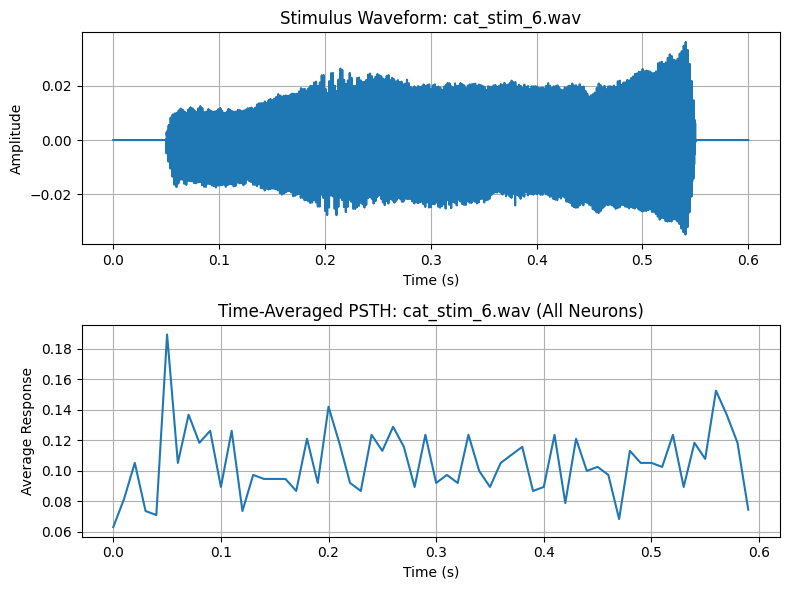

In [75]:
# --- Plotting ---
fig, axes = plt.subplots(2, 1, figsize=(8, 6)) # Reduced figure size
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot Stimulus Time Waveform
stimulus_filepath = os.path.join(stimuli_dir, demo_stimulus_key)
if os.path.exists(stimulus_filepath):
    rate, data = scipy.io.wavfile.read(stimulus_filepath)
    time_vector_stim = np.linspace(0, len(data) / rate, len(data))
    axes[0].plot(time_vector_stim, data)
    axes[0].set_xlabel("Time (s)")
    axes[0].set_ylabel("Amplitude")
    axes[0].set_title(f"Stimulus Waveform: {demo_stimulus_key}")
    axes[0].grid(True)
else:
    axes[0].set_title(f"Stimulus file not found: {demo_stimulus_key}")

# Plot Time-Averaged PSTH (Demo Neuron)
# Calculate average response across trials
avg_response = np.nanmean(demo_stim_response[:, :, :], axis=(0, 1))  # average along all trials and neurons
time_points_psth = np.arange(len(avg_response)) / saved_neural_data['meta_data']['fs_Hz']

axes[1].plot(time_points_psth, avg_response)
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Average Response")
axes[1].set_title(f"Time-Averaged PSTH: {demo_stimulus_key} (All Neurons)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Observations?
* Strong response when stimulus starts: Onset response
* Strong response when stimulus ends: Offset response

# Let's plot the average response for all stimuli in each category.

Steps:


1.   Group stimuli by category
2.   Calculate average response per category
3.   Plot average responses with error bars



## 1. Group stimuli by category

Create a dictionary or list that groups the stimulus filenames based on their categories. The dictionary will look like:

- **dog**
  - dog_stim_1.wav
  - dog_stim_2.wav
  - ...

- **cat**
  - cat_stim_1.wav
  - cat_stim_2.wav
  - ...
...

In [76]:
# Create an empty dictionary to store files by category
stimuli_by_category = {}

# Go through each filename in the list of wav_files
for filename in wav_files:
    # Extract the category (the part before the first "_")
    category = filename.split('_')[0]

    # If this category is not already in the dictionary, create a new list for it
    if category not in stimuli_by_category:
        stimuli_by_category[category] = []

    # Add the current filename to the list for its category
    stimuli_by_category[category].append(filename)

# Print the grouped results
print("Stimuli grouped by category:")
print(stimuli_by_category)


Stimuli grouped by category:
{'cat': ['cat_stim_1.wav', 'cat_stim_10.wav', 'cat_stim_11.wav', 'cat_stim_12.wav', 'cat_stim_13.wav', 'cat_stim_14.wav', 'cat_stim_15.wav', 'cat_stim_16.wav', 'cat_stim_17.wav', 'cat_stim_18.wav', 'cat_stim_19.wav', 'cat_stim_2.wav', 'cat_stim_20.wav', 'cat_stim_21.wav', 'cat_stim_22.wav', 'cat_stim_23.wav', 'cat_stim_24.wav', 'cat_stim_25.wav', 'cat_stim_26.wav', 'cat_stim_27.wav', 'cat_stim_28.wav', 'cat_stim_29.wav', 'cat_stim_3.wav', 'cat_stim_30.wav', 'cat_stim_31.wav', 'cat_stim_32.wav', 'cat_stim_33.wav', 'cat_stim_34.wav', 'cat_stim_35.wav', 'cat_stim_36.wav', 'cat_stim_37.wav', 'cat_stim_38.wav', 'cat_stim_39.wav', 'cat_stim_4.wav', 'cat_stim_40.wav', 'cat_stim_5.wav', 'cat_stim_6.wav', 'cat_stim_7.wav', 'cat_stim_8.wav', 'cat_stim_9.wav'], 'cow': ['cow_stim_1.wav', 'cow_stim_10.wav', 'cow_stim_11.wav', 'cow_stim_12.wav', 'cow_stim_13.wav', 'cow_stim_14.wav', 'cow_stim_15.wav', 'cow_stim_16.wav', 'cow_stim_17.wav', 'cow_stim_18.wav', 'cow_stim_19.

## 2. Calculate average response per category

### Subtask:
For each category, iterate through all the stimuli in that category, calculate the average neural response across trials and neurons for each stimulus, and then average these stimulus averages to get a category average. Also calculate the standard error of the mean across neurons for each time point within each category.


In [77]:
# Function to calculate average response for a single stimulus across trials and neurons
def calculate_stimulus_average(neural_data_stim):
    """Calculates the average neural response for a single stimulus."""
    return np.nanmean(neural_data_stim, axis=(0, 1))

# Function to calculate average response for a single stimulus across trials for each neuron
def calculate_stimulus_neuron_average(neural_data_stim):
    """Calculates the average neural response across trials for each neuron for a single stimulus."""
    return np.nanmean(neural_data_stim, axis=0)

# Function to calculate SEM across stimuli for each neuron and time point
def calculate_stimulus_neuron_sem(stacked_stimulus_neuron_avg):
    """Calculates the SEM across stimuli for each neuron and time point."""
    return np.nanstd(stacked_stimulus_neuron_avg, axis=0) / np.sqrt(stacked_stimulus_neuron_avg.shape[0])

category_avg_responses = {}
category_sem_responses = {}

for category, filenames in stimuli_by_category.items():
    stimulus_avg_responses = []
    stimulus_neuron_avg_responses = [] # List to store neuron-averaged responses per stimulus

    for filename in filenames:
        neural_data_stim = neural_data[filename]

        # Calculate average response across trials and neurons for the stimulus
        avg_response_stim = calculate_stimulus_average(neural_data_stim)
        stimulus_avg_responses.append(avg_response_stim)

        # Calculate average response across trials for each neuron for the stimulus
        avg_response_stim_neuron = calculate_stimulus_neuron_average(neural_data_stim)
        stimulus_neuron_avg_responses.append(avg_response_stim_neuron)


    # Calculate category average by averaging stimulus averages
    category_avg_responses[category] = np.nanmean(stimulus_avg_responses, axis=0)

    # Stack the stimulus-neuron averages to calculate SEM across stimuli for each time point
    # The shape will be (num_stimuli, num_neurons, num_time_points)
    stacked_stimulus_neuron_avg = np.stack(stimulus_neuron_avg_responses, axis=0)

    # Calculate SEM across stimuli (axis 0) for each neuron and time point using the function
    sem_response_stim_neuron = calculate_stimulus_neuron_sem(stacked_stimulus_neuron_avg)

    # Calculate the SEM for the category average by averaging the SEM across neurons
    category_sem_responses[category] = np.nanmean(sem_response_stim_neuron, axis=0)

print("Keys in category_avg_responses:")
print(category_avg_responses.keys())
print("\nKeys in category_sem_responses:")
print(category_sem_responses.keys())

Keys in category_avg_responses:
dict_keys(['cat', 'cow', 'dog', 'rooster'])

Keys in category_sem_responses:
dict_keys(['cat', 'cow', 'dog', 'rooster'])


## 3. Plot average responses with error bars

### Subtask:
Create a figure with subplots arranged in four columns (one for each category). In each subplot, plot the time-averaged neural response for that category with error bars representing the variability across neurons.


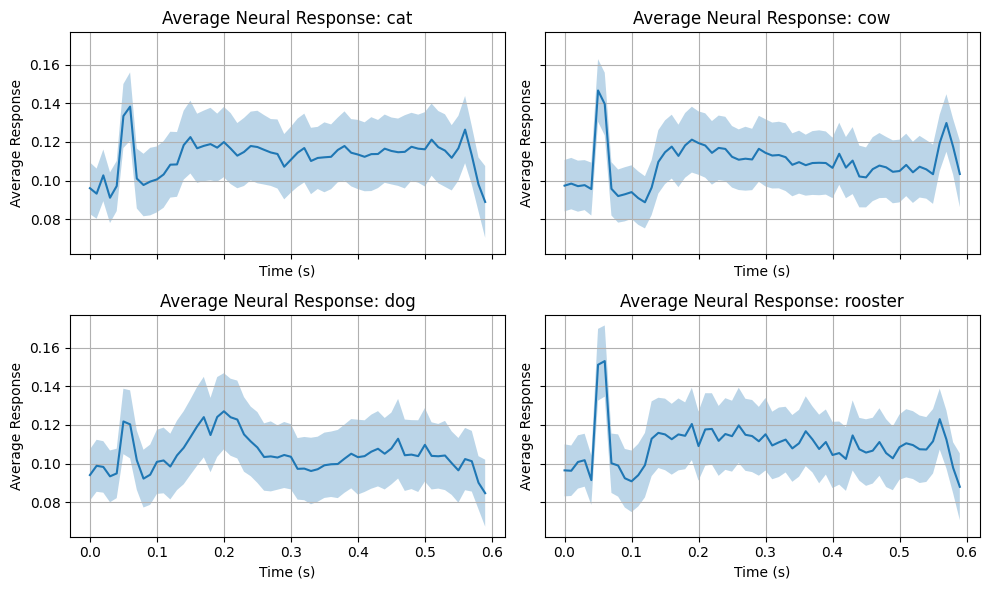

In [78]:
# Function to plot average response with error bars for a single category
def plot_category_response(ax, category, avg_response, sem_response, time_points):
    """Plots the average neural response with error bars for a single category."""
    ax.plot(time_points, avg_response, label=f'{category} Average')
    ax.fill_between(time_points, avg_response - sem_response, avg_response + sem_response, alpha=0.3)
    ax.set_title(f"Average Neural Response: {category}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Average Response")
    ax.grid(True)


# Determine the time points based on the sample rate and number of time samples
# Get the number of time samples from the shape of one of the neural data arrays
# Check if category_avg_responses is not empty before proceeding
if category_avg_responses and neural_data:
    # Get the first stimulus key to access its neural data shape
    first_stim_key = next(iter(neural_data.keys()))
    num_time_samples = neural_data[first_stim_key].shape[2] # Assuming time is the 3rd dimension (index 2)
    fs_Hz = saved_neural_data['meta_data']['fs_Hz']
    time_points = np.arange(num_time_samples) / fs_Hz


    # Create a 2x2 grid of subplots for the four categories
    fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
    axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

    # Iterate through each category and plot its average response with error bars using the function
    for i, (category, avg_response) in enumerate(category_avg_responses.items()):
        # Get the corresponding standard error of the mean for the current category
        sem_response = category_sem_responses[category]

        # Call the plotting function for the current category
        plot_category_response(axes[i], category, avg_response, sem_response, time_points)

    # Adjust layout to prevent overlapping titles/labels
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("No category average responses to plot.")

## Which category do the neurons like the most?
## How will you quantify it?